 Entrena una red neuronal para que reproduzca la siguientes funciones en el  intervalo  de  $[-1,1]$. Graficar  la  solucion  de la red en conjunto con la grafica de la funcion.

(a)  $3 sin(πx)$

(b)  $1 + 2x+ 4x^3$ 
 

# $3 sin(πx)$

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [124]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        
    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size=tf.shape(data)[0]
        x=tf.random.uniform((batch_size,1),minval=-2,maxval=2)
    
        with tf.GradientTape() as tape: 
            #Compute the loss value
            y_pred = self(x, training=True)
            eq = 3*tf.math.sin(math.pi*x)
            loss= keras.losses.mean_squared_error(eq, y_pred)
        # Apply grads
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Update metrics
        self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
        return {"loss": self.loss_tracker.result()}

NameError: name 'eq' is not defined

In [106]:
model = ODEsolver()

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [107]:
model.summary()

Model: "od_esolver_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 10)                20        
                                                                 
 dense_74 (Dense)            (None, 10)                110       
                                                                 
 dense_75 (Dense)            (None, 10)                110       
                                                                 
 dense_76 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(optimizer = RMSprop(), metrics=['loss'])

x= tf.linspace(-2,2,100)
history = model.fit(x, epochs=10000, verbose=1)

x_testv = tf.linspace(-2,2,100)
a = model.predict(x_testv)

Epoch 1/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1783
Epoch 2/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1559
Epoch 3/10000
4/4 [==============================] - 0s 667us/step - loss: 0.2074
Epoch 4/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1286
Epoch 5/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1888
Epoch 6/10000
4/4 [==============================] - 0s 668us/step - loss: 0.1576
Epoch 7/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1495
Epoch 8/10000
4/4 [==============================] - 0s 999us/step - loss: 0.2143
Epoch 9/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1146
Epoch 10/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1779
Epoch 11/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1348
Epoch 12/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0984
Epoch 13/100

4/4 [==============================] - 0s 667us/step - loss: 0.0730
Epoch 100/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0568
Epoch 101/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1195
Epoch 102/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1229
Epoch 103/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0987
Epoch 104/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1030
Epoch 105/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1401
Epoch 106/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1130
Epoch 107/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1326
Epoch 108/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1260
Epoch 109/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0881
Epoch 110/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1319
Epoch 111/

4/4 [==============================] - 0s 667us/step - loss: 0.0964
Epoch 197/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0966
Epoch 198/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0983
Epoch 199/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0938
Epoch 200/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0694
Epoch 201/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1042
Epoch 202/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0872
Epoch 203/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1129
Epoch 204/10000
4/4 [==============================] - 0s 834us/step - loss: 0.0883
Epoch 205/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1391
Epoch 206/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1065
Epoch 207/10000
4/4 [==============================] - 0s 667us/step - loss: 0.1062
Epoch 208/

4/4 [==============================] - 0s 667us/step - loss: 0.0526
Epoch 294/10000
4/4 [==============================] - 0s 668us/step - loss: 0.1005
Epoch 295/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0630
Epoch 296/10000
4/4 [==============================] - 0s 668us/step - loss: 0.1013
Epoch 297/10000
4/4 [==============================] - 0s 332us/step - loss: 0.0914
Epoch 298/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0862
Epoch 299/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0885
Epoch 300/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0838
Epoch 301/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0980
Epoch 302/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0570
Epoch 303/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0820
Epoch 304/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0983
Epoch 305/

4/4 [==============================] - 0s 666us/step - loss: 0.0683
Epoch 392/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0885
Epoch 393/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0739
Epoch 394/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0619
Epoch 395/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0751
Epoch 396/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0634
Epoch 397/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0614
Epoch 398/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0519
Epoch 399/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0583
Epoch 400/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0696
Epoch 401/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0691
Epoch 402/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0472
Epoch 403/10

Epoch 489/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0498
Epoch 490/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0489
Epoch 491/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0664
Epoch 492/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0535
Epoch 493/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0415
Epoch 494/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0778
Epoch 495/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0425
Epoch 496/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0614
Epoch 497/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0524
Epoch 498/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0666
Epoch 499/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0575
Epoch 500/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0

4/4 [==============================] - 0s 667us/step - loss: 0.0433
Epoch 587/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0381
Epoch 588/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0633
Epoch 589/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0444
Epoch 590/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0352
Epoch 591/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0566
Epoch 592/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0453
Epoch 593/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0480
Epoch 594/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0412
Epoch 595/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0604
Epoch 596/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0560
Epoch 597/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0469
Epoch 598/

4/4 [==============================] - 0s 667us/step - loss: 0.0293
Epoch 685/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0372
Epoch 686/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0358
Epoch 687/10000
4/4 [==============================] - 0s 769us/step - loss: 0.0482
Epoch 688/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0325
Epoch 689/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0476
Epoch 690/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0314
Epoch 691/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0395
Epoch 692/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0376
Epoch 693/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0356
Epoch 694/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0355
Epoch 695/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0417
Epoch 696/1

Epoch 782/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0405
Epoch 783/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0298
Epoch 784/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0189
Epoch 785/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0432
Epoch 786/10000
4/4 [==============================] - 0s 501us/step - loss: 0.0270
Epoch 787/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0270
Epoch 788/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0328
Epoch 789/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0301
Epoch 790/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0275
Epoch 791/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0358
Epoch 792/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0353
Epoch 793/10000
4/4 [==============================] - 0s 667us/step - loss:

4/4 [==============================] - 0s 757us/step - loss: 0.0250
Epoch 880/10000
4/4 [==============================] - 0s 669us/step - loss: 0.0173
Epoch 881/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0186
Epoch 882/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0185
Epoch 883/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0388
Epoch 884/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0223
Epoch 885/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0138
Epoch 886/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0183
Epoch 887/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0192
Epoch 888/10000
4/4 [==============================] - 0s 669us/step - loss: 0.0165
Epoch 889/10000
4/4 [==============================] - 0s 670us/step - loss: 0.0286
Epoch 890/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0159
Epoch 8

4/4 [==============================] - 0s 667us/step - loss: 0.0139
Epoch 977/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0209
Epoch 978/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0196
Epoch 979/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0083
Epoch 980/10000
4/4 [==============================] - 0s 721us/step - loss: 0.0143
Epoch 981/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0110
Epoch 982/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0252
Epoch 983/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0123
Epoch 984/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0076
Epoch 985/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0173
Epoch 986/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 987/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 988/

Epoch 1073/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0085
Epoch 1074/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0216
Epoch 1075/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0158
Epoch 1076/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 1077/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0103
Epoch 1078/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0099
Epoch 1079/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 1080/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0095
Epoch 1081/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0116
Epoch 1082/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0152
Epoch 1083/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0067
Epoch 1084/10000
4/4 [==============================] - 0s 667us/ste

4/4 [==============================] - 0s 667us/step - loss: 0.0075
Epoch 1170/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0137
Epoch 1171/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0178
Epoch 1172/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 1173/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0049
Epoch 1174/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0047
Epoch 1175/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0031
Epoch 1176/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0026
Epoch 1177/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0276
Epoch 1178/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0149
Epoch 1179/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0030
Epoch 1180/10000
4/4 [==============================] - 0s 667us/step - loss: 0.00

4/4 [==============================] - 0s 333us/step - loss: 0.0058
Epoch 1266/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 1267/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0112
Epoch 1268/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0224
Epoch 1269/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0054
Epoch 1270/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0059
Epoch 1271/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0158
Epoch 1272/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0040
Epoch 1273/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0054
Epoch 1274/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0093
Epoch 1275/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0059
Epoch 1276/10000
4/4 [==============================] - 0s 667us/step - loss: 0.00

4/4 [==============================] - 0s 667us/step - loss: 0.0042
Epoch 1362/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0044
Epoch 1363/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0088
Epoch 1364/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0159
Epoch 1365/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0072
Epoch 1366/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0033
Epoch 1367/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0078
Epoch 1368/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 1369/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0051
Epoch 1370/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0185
Epoch 1371/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0190
Epoch 1372/10000
4/4 [==============================] - 0s 669us/step - loss: 0.00

4/4 [==============================] - 0s 666us/step - loss: 0.0017
Epoch 1458/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0056
Epoch 1459/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0119
Epoch 1460/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0036
Epoch 1461/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0066
Epoch 1462/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 1463/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 1464/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0061
Epoch 1465/10000
4/4 [==============================] - 0s 836us/step - loss: 0.0216
Epoch 1466/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0074
Epoch 1467/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0024
Epoch 1468/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0051
Ep

4/4 [==============================] - 0s 1000us/step - loss: 0.0149
Epoch 1555/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0057
Epoch 1556/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0051
Epoch 1557/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0018
Epoch 1558/10000
4/4 [==============================] - 0s 830us/step - loss: 0.0043
Epoch 1559/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0196
Epoch 1560/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0055
Epoch 1561/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0025
Epoch 1562/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0043
Epoch 1563/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0057
Epoch 1564/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0065
Epoch 1565/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0

4/4 [==============================] - 0s 1000us/step - loss: 0.0065
Epoch 1651/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0064
Epoch 1652/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0023
Epoch 1653/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0105
Epoch 1654/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0178
Epoch 1655/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 1656/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0012
Epoch 1657/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0023
Epoch 1658/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0162
Epoch 1659/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0153
Epoch 1660/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0033
Epoch 1661/10000
4/4 [==============================] - 0s 667us/step - loss: 0.

4/4 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 1747/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0037
Epoch 1748/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 1749/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1750/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 1751/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0038
Epoch 1752/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 1753/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 1754/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0068
Epoch 1755/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 1756/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0112
Epoch 1757/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 1758/10

4/4 [==============================] - 0s 666us/step - loss: 0.0050
Epoch 1843/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 1844/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0231
Epoch 1845/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0081
Epoch 1846/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0012
Epoch 1847/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 1848/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0024
Epoch 1849/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0124
Epoch 1850/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0079
Epoch 1851/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0044
Epoch 1852/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0042
Epoch 1853/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0027

4/4 [==============================] - 0s 667us/step - loss: 0.0207
Epoch 1939/10000
4/4 [==============================] - 0s 669us/step - loss: 0.0039
Epoch 1940/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0024
Epoch 1941/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0060
Epoch 1942/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0076
Epoch 1943/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0050
Epoch 1944/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 1945/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 1946/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0034
Epoch 1947/10000
4/4 [==============================] - 0s 730us/step - loss: 0.0085
Epoch 1948/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0146
Epoch 1949/10000
4/4 [==============================] - 0s 667us/step - loss: 0.00

4/4 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 2035/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 2036/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0045
Epoch 2037/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 2038/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 2039/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0123
Epoch 2040/10000
4/4 [==============================] - 0s 1ms/step - loss: 8.9440e-04
Epoch 2041/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0037
Epoch 2042/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0107
Epoch 2043/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0070
Epoch 2044/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0041
Epoch 2045/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0085
Epo

4/4 [==============================] - 0s 667us/step - loss: 0.0033
Epoch 2131/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0104
Epoch 2132/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 2133/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0062
Epoch 2134/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0031
Epoch 2135/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0018
Epoch 2136/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 2137/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 2138/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0079
Epoch 2139/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0036
Epoch 2140/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0056
Epoch 2141/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0100
Ep

4/4 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 2227/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0099
Epoch 2228/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 2229/10000
4/4 [==============================] - 0s 663us/step - loss: 0.0025
Epoch 2230/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0112
Epoch 2231/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0087
Epoch 2232/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0075
Epoch 2233/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0060
Epoch 2234/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 2235/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 2236/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0034
Epoch 2237/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Ep

4/4 [==============================] - 0s 1000us/step - loss: 0.0067
Epoch 2323/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0077
Epoch 2324/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 2325/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0108
Epoch 2326/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 2327/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0012
Epoch 2328/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0015
Epoch 2329/10000
4/4 [==============================] - 0s 1ms/step - loss: 7.9813e-04
Epoch 2330/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0033
Epoch 2331/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 2332/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0082
Epoch 2333/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0119

4/4 [==============================] - 0s 667us/step - loss: 0.0017
Epoch 2419/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0054
Epoch 2420/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0222
Epoch 2421/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0036
Epoch 2422/10000
4/4 [==============================] - 0s 667us/step - loss: 8.9282e-04
Epoch 2423/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0035
Epoch 2424/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0153
Epoch 2425/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 2426/10000
4/4 [==============================] - 0s 667us/step - loss: 6.2668e-04
Epoch 2427/10000
4/4 [==============================] - 0s 667us/step - loss: 9.7371e-04
Epoch 2428/10000
4/4 [==============================] - 0s 685us/step - loss: 0.0139
Epoch 2429/10000
4/4 [==============================] - 0s 667us/step 

4/4 [==============================] - 0s 667us/step - loss: 9.6664e-04
Epoch 2515/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0038
Epoch 2516/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0094
Epoch 2517/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0074
Epoch 2518/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0027
Epoch 2519/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2520/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0121
Epoch 2521/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0109
Epoch 2522/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0035
Epoch 2523/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0010
Epoch 2524/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0015
Epoch 2525/10000
4/4 [==============================] - 0s 667us/step - loss: 0

4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 2611/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0044
Epoch 2612/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0024
Epoch 2613/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0166
Epoch 2614/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0101
Epoch 2615/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0015
Epoch 2616/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0021
Epoch 2617/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0070
Epoch 2618/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0128
Epoch 2619/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0040
Epoch 2620/10000
4/4 [==============================] - 0s 667us/step - loss: 9.9101e-04
Epoch 2621/10000
4/4 [==============================] - 0s 667us/step - loss: 

4/4 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 2707/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0090
Epoch 2708/10000
4/4 [==============================] - 0s 998us/step - loss: 0.0137
Epoch 2709/10000
4/4 [==============================] - 0s 1000us/step - loss: 6.9679e-04
Epoch 2710/10000
4/4 [==============================] - 0s 999us/step - loss: 7.8727e-04
Epoch 2711/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0015
Epoch 2712/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0118
Epoch 2713/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0030
Epoch 2714/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0126
Epoch 2715/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0030
Epoch 2716/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0101
Epoch 2717/10000
4/4 [==============================] - 0s 2ms/step - loss

4/4 [==============================] - 0s 666us/step - loss: 6.1179e-04
Epoch 2803/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0015
Epoch 2804/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 2805/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0161
Epoch 2806/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0098
Epoch 2807/10000
4/4 [==============================] - 0s 667us/step - loss: 9.4082e-04
Epoch 2808/10000
4/4 [==============================] - 0s 666us/step - loss: 8.6817e-04
Epoch 2809/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0109
Epoch 2810/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0109
Epoch 2811/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0017
Epoch 2812/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 2813/10000
4/4 [==============================] - 0s 1000us/step

4/4 [==============================] - 0s 667us/step - loss: 6.7872e-04
Epoch 2899/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 2900/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0051
Epoch 2901/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0097
Epoch 2902/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0045
Epoch 2903/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 2904/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0148
Epoch 2905/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0021
Epoch 2906/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0010
Epoch 2907/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0042
Epoch 2908/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0073
Epoch 2909/10000
4/4 [==============================] - 0s 738us/step - loss: 0.0

4/4 [==============================] - 0s 667us/step - loss: 0.0044
Epoch 2995/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0014
Epoch 2996/10000
4/4 [==============================] - 0s 667us/step - loss: 8.6796e-04
Epoch 2997/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0038
Epoch 2998/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0097
Epoch 2999/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0065
Epoch 3000/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0063
Epoch 3001/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0012
Epoch 3002/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0019
Epoch 3003/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0106
Epoch 3004/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 3005/10000
4/4 [==============================] - 0s 666us/step - loss: 8.

4/4 [==============================] - 0s 1000us/step - loss: 0.0077
Epoch 3091/10000
4/4 [==============================] - 0s 1000us/step - loss: 6.9956e-04
Epoch 3092/10000
4/4 [==============================] - 0s 741us/step - loss: 7.1516e-04
Epoch 3093/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0023
Epoch 3094/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0075
Epoch 3095/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0113
Epoch 3096/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0061
Epoch 3097/10000
4/4 [==============================] - 0s 667us/step - loss: 8.9056e-04
Epoch 3098/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0026
Epoch 3099/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 3100/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0213
Epoch 3101/10000
4/4 [==============================] - 0s 667us/st

4/4 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 3187/10000
4/4 [==============================] - 0s 1000us/step - loss: 8.7641e-04
Epoch 3188/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0146
Epoch 3189/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0098
Epoch 3190/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0010
Epoch 3191/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 3192/10000
4/4 [==============================] - 0s 714us/step - loss: 0.0038
Epoch 3193/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0065
Epoch 3194/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0064
Epoch 3195/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0044
Epoch 3196/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 3197/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0

4/4 [==============================] - 0s 667us/step - loss: 6.7397e-04
Epoch 3283/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 3284/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0023
Epoch 3285/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0019
Epoch 3286/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0246
Epoch 3287/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0053
Epoch 3288/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0012
Epoch 3289/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0023
Epoch 3290/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0041
Epoch 3291/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0108
Epoch 3292/10000
4/4 [==============================] - 0s 334us/step - loss: 0.0110
Epoch 3293/10000
4/4 [==============================] - 0s 667us/step - loss: 

4/4 [==============================] - 0s 667us/step - loss: 0.0078
Epoch 3379/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0014
Epoch 3380/10000
4/4 [==============================] - 0s 667us/step - loss: 7.5446e-04
Epoch 3381/10000
4/4 [==============================] - 0s 695us/step - loss: 0.0023
Epoch 3382/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0088
Epoch 3383/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0069
Epoch 3384/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0054
Epoch 3385/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0047
Epoch 3386/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0035
Epoch 3387/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0054
Epoch 3388/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0143
Epoch 3389/10000
4/4 [==============================] - 0s 667us/step - loss: 

4/4 [==============================] - 0s 667us/step - loss: 0.0047
Epoch 3475/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0026
Epoch 3476/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0171
Epoch 3477/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0017
Epoch 3478/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 3479/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0046
Epoch 3480/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0113
Epoch 3481/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 3482/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 3483/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 3484/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0092
Epoch 3485/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0062
Epo

4/4 [==============================] - 0s 1ms/step - loss: 9.6060e-04
Epoch 3571/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0017
Epoch 3572/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 3573/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0161
Epoch 3574/10000
4/4 [==============================] - 0s 667us/step - loss: 8.1512e-04
Epoch 3575/10000
4/4 [==============================] - 0s 667us/step - loss: 9.6660e-04
Epoch 3576/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0024
Epoch 3577/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0057
Epoch 3578/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0051
Epoch 3579/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0104
Epoch 3580/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0054
Epoch 3581/10000
4/4 [==============================] - 0s 1ms/step - loss

4/4 [==============================] - 0s 667us/step - loss: 0.0050
Epoch 3667/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 3668/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0061
Epoch 3669/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0117
Epoch 3670/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0023
Epoch 3671/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 3672/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0037
Epoch 3673/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0147
Epoch 3674/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0070
Epoch 3675/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 3676/10000
4/4 [==============================] - 0s 667us/step - loss: 6.6952e-04
Epoch 3677/10000
4/4 [==============================] - 0s 667us/step - loss: 0.

4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 3763/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0037
Epoch 3764/10000
4/4 [==============================] - 0s 334us/step - loss: 0.0080
Epoch 3765/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0080
Epoch 3766/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0075
Epoch 3767/10000
4/4 [==============================] - 0s 667us/step - loss: 6.4404e-04
Epoch 3768/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0012
Epoch 3769/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0046
Epoch 3770/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0109
Epoch 3771/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0052
Epoch 3772/10000
4/4 [==============================] - 0s 667us/step - loss: 7.4810e-04
Epoch 3773/10000
4/4 [==============================] - 0s 667us/step - lo

Epoch 3858/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 3859/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0012
Epoch 3860/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0010
Epoch 3861/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0103
Epoch 3862/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0099
Epoch 3863/10000
4/4 [==============================] - 0s 667us/step - loss: 8.9783e-04
Epoch 3864/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0147
Epoch 3865/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0043
Epoch 3866/10000
4/4 [==============================] - 0s 666us/step - loss: 7.3165e-04
Epoch 3867/10000
4/4 [==============================] - 0s 661us/step - loss: 0.0018
Epoch 3868/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0032
Epoch 3869/10000
4/4 [==============================] - 0

4/4 [==============================] - 0s 667us/step - loss: 0.0174
Epoch 3954/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 3955/10000
4/4 [==============================] - 0s 667us/step - loss: 7.7930e-04
Epoch 3956/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0036
Epoch 3957/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0140
Epoch 3958/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0027
Epoch 3959/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0012
Epoch 3960/10000
4/4 [==============================] - 0s 667us/step - loss: 8.9608e-04
Epoch 3961/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0088
Epoch 3962/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0075
Epoch 3963/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0014
Epoch 3964/10000
4/4 [==============================] - 0s 667us/step - lo

4/4 [==============================] - 0s 667us/step - loss: 0.0018
Epoch 4050/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0077
Epoch 4051/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0069
Epoch 4052/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0043
Epoch 4053/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0070
Epoch 4054/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0051
Epoch 4055/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0019
Epoch 4056/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0026
Epoch 4057/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0173
Epoch 4058/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 4059/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0012
Epoch 4060/10000
4/4 [==============================] - 0s 667us/step - loss: 9.395

4/4 [==============================] - 0s 666us/step - loss: 0.0027
Epoch 4146/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0089
Epoch 4147/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0030
Epoch 4148/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0026
Epoch 4149/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0049
Epoch 4150/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0048
Epoch 4151/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0134
Epoch 4152/10000
4/4 [==============================] - 0s 667us/step - loss: 5.6638e-04
Epoch 4153/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 4154/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0024
Epoch 4155/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 4156/10000
4/4 [==============================] - 0s 667us/step - loss: 

4/4 [==============================] - 0s 667us/step - loss: 6.1045e-04
Epoch 4242/10000
4/4 [==============================] - 0s 1ms/step - loss: 9.0055e-04
Epoch 4243/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0031
Epoch 4244/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0156
Epoch 4245/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 4246/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0017
Epoch 4247/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0047
Epoch 4248/10000
4/4 [==============================] - 0s 331us/step - loss: 0.0115
Epoch 4249/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0042
Epoch 4250/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0028
Epoch 4251/10000
4/4 [==============================] - 0s 835us/step - loss: 0.0028
Epoch 4252/10000
4/4 [==============================] - 0s 666us/step - loss

4/4 [==============================] - 0s 1000us/step - loss: 0.0032
Epoch 4337/10000
4/4 [==============================] - 0s 667us/step - loss: 9.6762e-04
Epoch 4338/10000
4/4 [==============================] - 0s 675us/step - loss: 0.0028
Epoch 4339/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0132
Epoch 4340/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0052
Epoch 4341/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0102
Epoch 4342/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 4343/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0012
Epoch 4344/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 4345/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0026
Epoch 4346/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0057
Epoch 4347/10000
4/4 [==============================] - 0s 333us/step - loss:

4/4 [==============================] - 0s 667us/step - loss: 7.9378e-04
Epoch 4433/10000
4/4 [==============================] - 0s 667us/step - loss: 5.7695e-04
Epoch 4434/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0103
Epoch 4435/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0072
Epoch 4436/10000
4/4 [==============================] - 0s 667us/step - loss: 8.7819e-04
Epoch 4437/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0032
Epoch 4438/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0057
Epoch 4439/10000
4/4 [==============================] - 0s 664us/step - loss: 0.0086
Epoch 4440/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0079
Epoch 4441/10000
4/4 [==============================] - 0s 333us/step - loss: 9.9771e-04
Epoch 4442/10000
4/4 [==============================] - 0s 667us/step - loss: 6.0868e-04
Epoch 4443/10000
4/4 [==============================] - 0s 667

4/4 [==============================] - 0s 666us/step - loss: 0.0020
Epoch 4528/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0031
Epoch 4529/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0053
Epoch 4530/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0062
Epoch 4531/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0113
Epoch 4532/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 4533/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0011
Epoch 4534/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0081
Epoch 4535/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0046
Epoch 4536/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0016
Epoch 4537/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0055
Epoch 4538/10000
4/4 [==============================] - 0s 666us/step - loss: 0.00

4/4 [==============================] - 0s 667us/step - loss: 0.0026
Epoch 4624/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 4625/10000
4/4 [==============================] - 0s 1ms/step - loss: 5.4194e-04
Epoch 4626/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0018
Epoch 4627/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0170
Epoch 4628/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0073
Epoch 4629/10000
4/4 [==============================] - 0s 666us/step - loss: 9.7727e-04
Epoch 4630/10000
4/4 [==============================] - 0s 667us/step - loss: 6.3730e-04
Epoch 4631/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0031
Epoch 4632/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0053
Epoch 4633/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0071
Epoch 4634/10000
4/4 [==============================] - 0s 667us/step - 

4/4 [==============================] - 0s 666us/step - loss: 0.0048
Epoch 4720/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0045
Epoch 4721/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0057
Epoch 4722/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0053
Epoch 4723/10000
4/4 [==============================] - 0s 667us/step - loss: 9.8247e-04
Epoch 4724/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 4725/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 4726/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 4727/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0160
Epoch 4728/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0030
Epoch 4729/10000
4/4 [==============================] - 0s 671us/step - loss: 0.0015
Epoch 4730/10000
4/4 [==============================] - 0s 667us/step - loss: 0.

4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 4816/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0028
Epoch 4817/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0132
Epoch 4818/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0021
Epoch 4819/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0013
Epoch 4820/10000
4/4 [==============================] - 0s 667us/step - loss: 8.0027e-04
Epoch 4821/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0014
Epoch 4822/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0174
Epoch 4823/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0052
Epoch 4824/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0021
Epoch 4825/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0103
Epoch 4826/10000
4/4 [==============================] - 0s 667us/step - loss: 

4/4 [==============================] - 0s 1000us/step - loss: 0.0047
Epoch 4912/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0126
Epoch 4913/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0037
Epoch 4914/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0011
Epoch 4915/10000
4/4 [==============================] - 0s 667us/step - loss: 5.8874e-04
Epoch 4916/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0069
Epoch 4917/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0132
Epoch 4918/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0055
Epoch 4919/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 4920/10000
4/4 [==============================] - 0s 667us/step - loss: 8.6021e-04
Epoch 4921/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0027
Epoch 4922/10000
4/4 [==============================] - 0s 667us/step - los

4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 5007/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0033
Epoch 5008/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 5009/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0115
Epoch 5010/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0021
Epoch 5011/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 5012/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0135
Epoch 5013/10000
4/4 [==============================] - 0s 663us/step - loss: 0.0034
Epoch 5014/10000
4/4 [==============================] - 0s 667us/step - loss: 5.1763e-04
Epoch 5015/10000
4/4 [==============================] - 0s 1ms/step - loss: 7.2123e-04
Epoch 5016/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 5017/10000
4/4 [==============================] - 0s 1ms/step - loss: 0

4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 5102/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0073
Epoch 5103/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 5104/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 5105/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0042
Epoch 5106/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0085
Epoch 5107/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0067
Epoch 5108/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0028
Epoch 5109/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0025
Epoch 5110/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0021
Epoch 5111/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0039
Epoch 5112/10000
4/4 [==============================] - 0s 668us/step - loss: 0.00

4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 5198/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0059
Epoch 5199/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0105
Epoch 5200/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0037
Epoch 5201/10000
4/4 [==============================] - 0s 836us/step - loss: 0.0030
Epoch 5202/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0015
Epoch 5203/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0114
Epoch 5204/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0027
Epoch 5205/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0016
Epoch 5206/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0050
Epoch 5207/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 5208/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0

4/4 [==============================] - 0s 334us/step - loss: 0.0033
Epoch 5293/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0044
Epoch 5294/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0099
Epoch 5295/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0102
Epoch 5296/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 5297/10000
4/4 [==============================] - 0s 667us/step - loss: 8.9106e-04
Epoch 5298/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0026
Epoch 5299/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0074
Epoch 5300/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0069
Epoch 5301/10000
4/4 [==============================] - 0s 664us/step - loss: 0.0027
Epoch 5302/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0090
Epoch 5303/10000
4/4 [==============================] - 0s 666us/step - loss: 

Epoch 5388/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0108
Epoch 5389/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0045
Epoch 5390/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0025
Epoch 5391/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0071
Epoch 5392/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0047
Epoch 5393/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0038
Epoch 5394/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0095
Epoch 5395/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0024
Epoch 5396/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0033
Epoch 5397/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0025
Epoch 5398/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0046
Epoch 5399/10000
4/4 [==============================] - 0s 666us/

4/4 [==============================] - 0s 667us/step - loss: 0.0090
Epoch 5484/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0027
Epoch 5485/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0045
Epoch 5486/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0063
Epoch 5487/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0137
Epoch 5488/10000
4/4 [==============================] - 0s 667us/step - loss: 6.2978e-04
Epoch 5489/10000
4/4 [==============================] - 0s 667us/step - loss: 4.7334e-04
Epoch 5490/10000
4/4 [==============================] - 0s 333us/step - loss: 8.5236e-04
Epoch 5491/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0035
Epoch 5492/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0095
Epoch 5493/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0037
Epoch 5494/10000
4/4 [==============================] - 0s 667us/step 

Epoch 5579/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0028
Epoch 5580/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0109
Epoch 5581/10000
4/4 [==============================] - 0s 664us/step - loss: 0.0046
Epoch 5582/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0040
Epoch 5583/10000
4/4 [==============================] - 0s 334us/step - loss: 0.0022
Epoch 5584/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0124
Epoch 5585/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0083
Epoch 5586/10000
4/4 [==============================] - 0s 667us/step - loss: 9.1694e-04
Epoch 5587/10000
4/4 [==============================] - 0s 333us/step - loss: 7.2903e-04
Epoch 5588/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0012
Epoch 5589/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0106
Epoch 5590/10000
4/4 [==============================] - 0

4/4 [==============================] - 0s 667us/step - loss: 6.0324e-04
Epoch 5675/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 5676/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0033
Epoch 5677/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0035
Epoch 5678/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 5679/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0032
Epoch 5680/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0095
Epoch 5681/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0028
Epoch 5682/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0061
Epoch 5683/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0063
Epoch 5684/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0021
Epoch 5685/10000
4/4 [==============================] - 0s 667us/step - loss: 0.00

4/4 [==============================] - 0s 667us/step - loss: 6.7742e-04
Epoch 5770/10000
4/4 [==============================] - 0s 667us/step - loss: 8.3905e-04
Epoch 5771/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 5772/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0036
Epoch 5773/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0047
Epoch 5774/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0061
Epoch 5775/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0024
Epoch 5776/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0019
Epoch 5777/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0073
Epoch 5778/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0050
Epoch 5779/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0032
Epoch 5780/10000
4/4 [==============================] - 0s 667us/step - loss

4/4 [==============================] - 0s 667us/step - loss: 0.0037
Epoch 5866/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 5867/10000
4/4 [==============================] - 0s 667us/step - loss: 5.0885e-04
Epoch 5868/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0031
Epoch 5869/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0156
Epoch 5870/10000
4/4 [==============================] - 0s 667us/step - loss: 6.8321e-04
Epoch 5871/10000
4/4 [==============================] - 0s 667us/step - loss: 4.6041e-04
Epoch 5872/10000
4/4 [==============================] - 0s 667us/step - loss: 5.4194e-04
Epoch 5873/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 5874/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0101
Epoch 5875/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0065
Epoch 5876/10000
4/4 [==============================] - 0s 666us/s

4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 5961/10000
4/4 [==============================] - 0s 667us/step - loss: 6.6566e-04
Epoch 5962/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0032
Epoch 5963/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0113
Epoch 5964/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0040
Epoch 5965/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0031
Epoch 5966/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 5967/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0034
Epoch 5968/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0012
Epoch 5969/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0124
Epoch 5970/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0064
Epoch 5971/10000
4/4 [==============================] - 0s 834us/step - loss:

4/4 [==============================] - 0s 667us/step - loss: 6.8626e-04
Epoch 6056/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 6057/10000
4/4 [==============================] - 0s 739us/step - loss: 0.0159
Epoch 6058/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0029
Epoch 6059/10000
4/4 [==============================] - 0s 667us/step - loss: 7.5348e-04
Epoch 6060/10000
4/4 [==============================] - 0s 666us/step - loss: 8.1889e-04
Epoch 6061/10000
4/4 [==============================] - 0s 667us/step - loss: 6.5429e-04
Epoch 6062/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0019
Epoch 6063/10000
4/4 [==============================] - 0s 661us/step - loss: 0.0016
Epoch 6064/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0062
Epoch 6065/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0151
Epoch 6066/10000
4/4 [==============================] - 0s 667us/ste

4/4 [==============================] - 0s 667us/step - loss: 0.0040
Epoch 6151/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0023
Epoch 6152/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0027
Epoch 6153/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0051
Epoch 6154/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0028
Epoch 6155/10000
4/4 [==============================] - 0s 667us/step - loss: 7.8347e-04
Epoch 6156/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0042
Epoch 6157/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0221
Epoch 6158/10000
4/4 [==============================] - 0s 1ms/step - loss: 5.4371e-04
Epoch 6159/10000
4/4 [==============================] - 0s 1ms/step - loss: 3.4436e-04
Epoch 6160/10000
4/4 [==============================] - 0s 1ms/step - loss: 4.7192e-04
Epoch 6161/10000
4/4 [==============================] - 0s 667us/step - 

4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 6246/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0095
Epoch 6247/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0030
Epoch 6248/10000
4/4 [==============================] - 0s 667us/step - loss: 4.2627e-04
Epoch 6249/10000
4/4 [==============================] - 0s 835us/step - loss: 0.0018
Epoch 6250/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0123
Epoch 6251/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0039
Epoch 6252/10000
4/4 [==============================] - 0s 666us/step - loss: 6.9753e-04
Epoch 6253/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0039
Epoch 6254/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0024
Epoch 6255/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0041
Epoch 6256/10000
4/4 [==============================] - 0s 1000us/step - l

4/4 [==============================] - 0s 667us/step - loss: 4.5838e-04
Epoch 6341/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 6342/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0136
Epoch 6343/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0040
Epoch 6344/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0011
Epoch 6345/10000
4/4 [==============================] - 0s 667us/step - loss: 4.5504e-04
Epoch 6346/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0048
Epoch 6347/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0144
Epoch 6348/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0025
Epoch 6349/10000
4/4 [==============================] - 0s 667us/step - loss: 4.6206e-04
Epoch 6350/10000
4/4 [==============================] - 0s 667us/step - loss: 6.4413e-04
Epoch 6351/10000
4/4 [==============================] - 0s 1ms/ste

4/4 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 6436/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0052
Epoch 6437/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 6438/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0024
Epoch 6439/10000
4/4 [==============================] - 0s 997us/step - loss: 0.0069
Epoch 6440/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 6441/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0051
Epoch 6442/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 6443/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0045
Epoch 6444/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 6445/10000
4/4 [==============================] - 0s 599us/step - loss: 0.0045
Epoch 6446/10000
4/4 [==============================] - 0s 835us/step - loss: 0.0042
Epoch

4/4 [==============================] - 0s 667us/step - loss: 0.0148
Epoch 6532/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 6533/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0016
Epoch 6534/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0017
Epoch 6535/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0033
Epoch 6536/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0063
Epoch 6537/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0085
Epoch 6538/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 6539/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0038
Epoch 6540/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0057
Epoch 6541/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0017
Epoch 6542/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0

4/4 [==============================] - 0s 667us/step - loss: 0.0073
Epoch 6627/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0117
Epoch 6628/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0035
Epoch 6629/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 6630/10000
4/4 [==============================] - 0s 667us/step - loss: 4.8465e-04
Epoch 6631/10000
4/4 [==============================] - 0s 667us/step - loss: 6.4316e-04
Epoch 6632/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0015
Epoch 6633/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0097
Epoch 6634/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0056
Epoch 6635/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0036
Epoch 6636/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0054
Epoch 6637/10000
4/4 [==============================] - 0s 667us/step - l

4/4 [==============================] - 0s 667us/step - loss: 0.0070
Epoch 6723/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0033
Epoch 6724/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0041
Epoch 6725/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0027
Epoch 6726/10000
4/4 [==============================] - 0s 729us/step - loss: 0.0028
Epoch 6727/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 6728/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0069
Epoch 6729/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0053
Epoch 6730/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0111
Epoch 6731/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 6732/10000
4/4 [==============================] - 0s 667us/step - loss: 4.8000e-04
Epoch 6733/10000
4/4 [==============================] - 0s 665us/step - loss: 

Epoch 6818/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 6819/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 6820/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0031
Epoch 6821/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0063
Epoch 6822/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0059
Epoch 6823/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0016
Epoch 6824/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0087
Epoch 6825/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0056
Epoch 6826/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 6827/10000
4/4 [==============================] - 0s 680us/step - loss: 4.6073e-04
Epoch 6828/10000
4/4 [==============================] - 0s 743us/step - loss: 0.0013
Epoch 6829/10000
4/4 [==============================] - 0s 667us/s

4/4 [==============================] - 0s 667us/step - loss: 0.0015
Epoch 6914/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 6915/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0042
Epoch 6916/10000
4/4 [==============================] - 0s 684us/step - loss: 0.0037
Epoch 6917/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0068
Epoch 6918/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0062
Epoch 6919/10000
4/4 [==============================] - 0s 667us/step - loss: 6.7914e-04
Epoch 6920/10000
4/4 [==============================] - 0s 667us/step - loss: 7.7819e-04
Epoch 6921/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0030
Epoch 6922/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0092
Epoch 6923/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0063
Epoch 6924/10000
4/4 [==============================] - 0s 667us/step - lo

4/4 [==============================] - 0s 667us/step - loss: 0.0056
Epoch 7009/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0145
Epoch 7010/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0039
Epoch 7011/10000
4/4 [==============================] - 0s 667us/step - loss: 9.3223e-04
Epoch 7012/10000
4/4 [==============================] - 0s 667us/step - loss: 3.4262e-04
Epoch 7013/10000
4/4 [==============================] - 0s 667us/step - loss: 8.2317e-04
Epoch 7014/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 7015/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0074
Epoch 7016/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0070
Epoch 7017/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 7018/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0037
Epoch 7019/10000
4/4 [==============================] - 0s 667us/step 

4/4 [==============================] - 0s 666us/step - loss: 0.0053
Epoch 7104/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0053
Epoch 7105/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 7106/10000
4/4 [==============================] - 0s 667us/step - loss: 5.5954e-04
Epoch 7107/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 7108/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0215
Epoch 7109/10000
4/4 [==============================] - 0s 667us/step - loss: 9.7249e-04
Epoch 7110/10000
4/4 [==============================] - 0s 668us/step - loss: 3.7945e-04
Epoch 7111/10000
4/4 [==============================] - 0s 666us/step - loss: 3.8557e-04
Epoch 7112/10000
4/4 [==============================] - 0s 1000us/step - loss: 4.8929e-04
Epoch 7113/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0074
Epoch 7114/10000
4/4 [==============================] - 0s 68

4/4 [==============================] - 0s 1000us/step - loss: 0.0069
Epoch 7199/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 7200/10000
4/4 [==============================] - 0s 713us/step - loss: 7.3757e-04
Epoch 7201/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0010
Epoch 7202/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0191
Epoch 7203/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 7204/10000
4/4 [==============================] - 0s 667us/step - loss: 4.6736e-04
Epoch 7205/10000
4/4 [==============================] - 0s 667us/step - loss: 3.8663e-04
Epoch 7206/10000
4/4 [==============================] - 0s 667us/step - loss: 5.7655e-04
Epoch 7207/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 7208/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0081
Epoch 7209/10000
4/4 [==============================] - 0s 667us/step

4/4 [==============================] - 0s 1ms/step - loss: 6.3644e-04
Epoch 7294/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 7295/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0111
Epoch 7296/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 7297/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 7298/10000
4/4 [==============================] - 0s 667us/step - loss: 9.1149e-04
Epoch 7299/10000
4/4 [==============================] - 0s 667us/step - loss: 5.6325e-04
Epoch 7300/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0038
Epoch 7301/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0074
Epoch 7302/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0054
Epoch 7303/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0060
Epoch 7304/10000
4/4 [==============================] - 0s 665us/step - loss

4/4 [==============================] - 0s 667us/step - loss: 0.0078
Epoch 7390/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0080
Epoch 7391/10000
4/4 [==============================] - 0s 667us/step - loss: 9.1837e-04
Epoch 7392/10000
4/4 [==============================] - 0s 667us/step - loss: 8.0635e-04
Epoch 7393/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0010
Epoch 7394/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0088
Epoch 7395/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0049
Epoch 7396/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0013
Epoch 7397/10000
4/4 [==============================] - 0s 667us/step - loss: 7.5334e-04
Epoch 7398/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0087
Epoch 7399/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0078
Epoch 7400/10000
4/4 [==============================] - 0s 667us/step 

4/4 [==============================] - 0s 666us/step - loss: 0.0033
Epoch 7485/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0027
Epoch 7486/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0020
Epoch 7487/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0067
Epoch 7488/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0031
Epoch 7489/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0019
Epoch 7490/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0026
Epoch 7491/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0077
Epoch 7492/10000
4/4 [==============================] - 0s 709us/step - loss: 0.0016
Epoch 7493/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 7494/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0096
Epoch 7495/10000
4/4 [==============================] - 0s 667us/step - loss: 0.00

4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 7580/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0016
Epoch 7581/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0017
Epoch 7582/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0032
Epoch 7583/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0116
Epoch 7584/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0039
Epoch 7585/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0023
Epoch 7586/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0106
Epoch 7587/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0038
Epoch 7588/10000
4/4 [==============================] - 0s 667us/step - loss: 4.1384e-04
Epoch 7589/10000
4/4 [==============================] - 0s 667us/step - loss: 9.3165e-04
Epoch 7590/10000
4/4 [==============================] - 0s 667us/step - lo

4/4 [==============================] - 0s 667us/step - loss: 0.0103
Epoch 7675/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0061
Epoch 7676/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0013
Epoch 7677/10000
4/4 [==============================] - 0s 667us/step - loss: 6.5899e-04
Epoch 7678/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 7679/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0134
Epoch 7680/10000
4/4 [==============================] - 0s 334us/step - loss: 0.0025
Epoch 7681/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0019
Epoch 7682/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 7683/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 7684/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0063
Epoch 7685/10000
4/4 [==============================] - 0s 667us/step - loss: 

4/4 [==============================] - 0s 1ms/step - loss: 3.6237e-04
Epoch 7770/10000
4/4 [==============================] - 0s 1ms/step - loss: 4.6092e-04
Epoch 7771/10000
4/4 [==============================] - 0s 667us/step - loss: 8.8619e-04
Epoch 7772/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0040
Epoch 7773/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0081
Epoch 7774/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0017
Epoch 7775/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0081
Epoch 7776/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0057
Epoch 7777/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 7778/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0015
Epoch 7779/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0024
Epoch 7780/10000
4/4 [==============================] - 0s 667us/step - lo

4/4 [==============================] - 0s 667us/step - loss: 4.9142e-04
Epoch 7865/10000
4/4 [==============================] - 0s 667us/step - loss: 5.8853e-04
Epoch 7866/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 7867/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0085
Epoch 7868/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0109
Epoch 7869/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 7870/10000
4/4 [==============================] - 0s 667us/step - loss: 9.2302e-04
Epoch 7871/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0041
Epoch 7872/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0038
Epoch 7873/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0065
Epoch 7874/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 7875/10000
4/4 [==============================] - 0s 667us/step

4/4 [==============================] - 0s 667us/step - loss: 0.0025
Epoch 7960/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0179
Epoch 7961/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 7962/10000
4/4 [==============================] - 0s 667us/step - loss: 4.6786e-04
Epoch 7963/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 7964/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0021
Epoch 7965/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 7966/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0058
Epoch 7967/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 7968/10000
4/4 [==============================] - 0s 667us/step - loss: 8.2554e-04
Epoch 7969/10000
4/4 [==============================] - 0s 666us/step - loss: 4.6875e-04
Epoch 7970/10000
4/4 [==============================] - 0s 667us/step - lo

4/4 [==============================] - 0s 333us/step - loss: 0.0020
Epoch 8055/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0060
Epoch 8056/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0051
Epoch 8057/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0122
Epoch 8058/10000
4/4 [==============================] - 0s 667us/step - loss: 6.2362e-04
Epoch 8059/10000
4/4 [==============================] - 0s 667us/step - loss: 3.7729e-04
Epoch 8060/10000
4/4 [==============================] - 0s 667us/step - loss: 7.9565e-04
Epoch 8061/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0093
Epoch 8062/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0017
Epoch 8063/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0042
Epoch 8064/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0027
Epoch 8065/10000
4/4 [==============================] - 0s 667us/step 

4/4 [==============================] - 0s 666us/step - loss: 4.6513e-04
Epoch 8150/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0093
Epoch 8151/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0060
Epoch 8152/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0075
Epoch 8153/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0017
Epoch 8154/10000
4/4 [==============================] - 0s 333us/step - loss: 3.3496e-04
Epoch 8155/10000
4/4 [==============================] - 0s 667us/step - loss: 9.9042e-04
Epoch 8156/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0018
Epoch 8157/10000
4/4 [==============================] - 0s 659us/step - loss: 0.0133
Epoch 8158/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0018
Epoch 8159/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 8160/10000
4/4 [==============================] - 0s 667us/step 

4/4 [==============================] - 0s 828us/step - loss: 0.0073
Epoch 8245/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0013
Epoch 8246/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0026
Epoch 8247/10000
4/4 [==============================] - 0s 1000us/step - loss: 7.8041e-04
Epoch 8248/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0028
Epoch 8249/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0071
Epoch 8250/10000
4/4 [==============================] - 0s 669us/step - loss: 0.0059
Epoch 8251/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 8252/10000
4/4 [==============================] - 0s 664us/step - loss: 0.0016
Epoch 8253/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 8254/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0107
Epoch 8255/10000
4/4 [==============================] - 0s 1000us/step - loss:

4/4 [==============================] - 0s 666us/step - loss: 0.0018
Epoch 8340/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0046
Epoch 8341/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0058
Epoch 8342/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0032
Epoch 8343/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0014
Epoch 8344/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0082
Epoch 8345/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0057
Epoch 8346/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 8347/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 8348/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0055
Epoch 8349/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0044
Epoch 8350/10000
4/4 [==============================] - 0s 1ms/step - loss: 6.3224

4/4 [==============================] - 0s 667us/step - loss: 4.6767e-04
Epoch 8435/10000
4/4 [==============================] - 0s 667us/step - loss: 6.7063e-04
Epoch 8436/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 8437/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0077
Epoch 8438/10000
4/4 [==============================] - 0s 333us/step - loss: 6.2950e-04
Epoch 8439/10000
4/4 [==============================] - 0s 1ms/step - loss: 6.2922e-04
Epoch 8440/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0053
Epoch 8441/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0092
Epoch 8442/10000
4/4 [==============================] - 0s 667us/step - loss: 5.0842e-04
Epoch 8443/10000
4/4 [==============================] - 0s 1ms/step - loss: 3.6468e-04
Epoch 8444/10000
4/4 [==============================] - 0s 666us/step - loss: 5.0651e-04
Epoch 8445/10000
4/4 [==============================] - 0s 1

4/4 [==============================] - 0s 666us/step - loss: 7.4251e-04
Epoch 8530/10000
4/4 [==============================] - 0s 667us/step - loss: 3.0662e-04
Epoch 8531/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0100
Epoch 8532/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 8533/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0026
Epoch 8534/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0027
Epoch 8535/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0028
Epoch 8536/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0046
Epoch 8537/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0052
Epoch 8538/10000
4/4 [==============================] - 0s 669us/step - loss: 0.0011
Epoch 8539/10000
4/4 [==============================] - 0s 667us/step - loss: 9.1799e-04
Epoch 8540/10000
4/4 [==============================] - 0s 665us/step 

4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 8625/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0047
Epoch 8626/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0095
Epoch 8627/10000
4/4 [==============================] - 0s 667us/step - loss: 6.5220e-04
Epoch 8628/10000
4/4 [==============================] - 0s 667us/step - loss: 2.8859e-04
Epoch 8629/10000
4/4 [==============================] - 0s 667us/step - loss: 2.6146e-04
Epoch 8630/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0033
Epoch 8631/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0072
Epoch 8632/10000
4/4 [==============================] - 0s 667us/step - loss: 5.5565e-04
Epoch 8633/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0058
Epoch 8634/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0027
Epoch 8635/10000
4/4 [==============================] - 0s 666us/s

4/4 [==============================] - 0s 667us/step - loss: 0.0019
Epoch 8720/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0101
Epoch 8721/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 8722/10000
4/4 [==============================] - 0s 333us/step - loss: 5.6031e-04
Epoch 8723/10000
4/4 [==============================] - 0s 667us/step - loss: 4.8966e-04
Epoch 8724/10000
4/4 [==============================] - 0s 667us/step - loss: 5.0678e-04
Epoch 8725/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 8726/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0137
Epoch 8727/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0024
Epoch 8728/10000
4/4 [==============================] - 0s 667us/step - loss: 3.8087e-04
Epoch 8729/10000
4/4 [==============================] - 0s 667us/step - loss: 3.1338e-04
Epoch 8730/10000
4/4 [==============================] - 0s 33

4/4 [==============================] - 0s 667us/step - loss: 0.0041
Epoch 8814/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0086
Epoch 8815/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0037
Epoch 8816/10000
4/4 [==============================] - 0s 667us/step - loss: 7.6857e-04
Epoch 8817/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0022
Epoch 8818/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0105
Epoch 8819/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0062
Epoch 8820/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 8821/10000
4/4 [==============================] - 0s 667us/step - loss: 5.2842e-04
Epoch 8822/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0012
Epoch 8823/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0012
Epoch 8824/10000
4/4 [==============================] - 0s 667us/step - lo

4/4 [==============================] - 0s 667us/step - loss: 0.0060
Epoch 8909/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0085
Epoch 8910/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0024
Epoch 8911/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 8912/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0014
Epoch 8913/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0056
Epoch 8914/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0019
Epoch 8915/10000
4/4 [==============================] - 0s 667us/step - loss: 5.7237e-04
Epoch 8916/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0044
Epoch 8917/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0084
Epoch 8918/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0045
Epoch 8919/10000
4/4 [==============================] - 0s 667us/step - loss: 

4/4 [==============================] - 0s 333us/step - loss: 0.0017
Epoch 9004/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0070
Epoch 9005/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0106
Epoch 9006/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 9007/10000
4/4 [==============================] - 0s 667us/step - loss: 6.8268e-04
Epoch 9008/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0011
Epoch 9009/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 9010/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0092
Epoch 9011/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0033
Epoch 9012/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 9013/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0033
Epoch 9014/10000
4/4 [==============================] - 0s 1000us/step - loss:

4/4 [==============================] - 0s 334us/step - loss: 6.1952e-04
Epoch 9099/10000
4/4 [==============================] - 0s 667us/step - loss: 3.7766e-04
Epoch 9100/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0012
Epoch 9101/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0070
Epoch 9102/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0017
Epoch 9103/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0074
Epoch 9104/10000
4/4 [==============================] - 0s 729us/step - loss: 0.0017
Epoch 9105/10000
4/4 [==============================] - 0s 676us/step - loss: 7.8492e-04
Epoch 9106/10000
4/4 [==============================] - 0s 691us/step - loss: 0.0015
Epoch 9107/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0056
Epoch 9108/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0134
Epoch 9109/10000
4/4 [==============================] - 0s 1000us/ste

4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 9194/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0091
Epoch 9195/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0032
Epoch 9196/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 9197/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0012
Epoch 9198/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0111
Epoch 9199/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 9200/10000
4/4 [==============================] - 0s 667us/step - loss: 4.5426e-04
Epoch 9201/10000
4/4 [==============================] - 0s 667us/step - loss: 6.3101e-04
Epoch 9202/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0011
Epoch 9203/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0048
Epoch 9204/10000
4/4 [==============================] - 0s 667us/step - lo

4/4 [==============================] - 0s 667us/step - loss: 9.5763e-04
Epoch 9289/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0047
Epoch 9290/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0061
Epoch 9291/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0016
Epoch 9292/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0041
Epoch 9293/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 9294/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0039
Epoch 9295/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0042
Epoch 9296/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 9297/10000
4/4 [==============================] - 0s 663us/step - loss: 0.0120
Epoch 9298/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0012
Epoch 9299/10000
4/4 [==============================] - 0s 666us/step - loss: 

4/4 [==============================] - 0s 666us/step - loss: 0.0027
Epoch 9384/10000
4/4 [==============================] - 0s 672us/step - loss: 0.0012
Epoch 9385/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0072
Epoch 9386/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0034
Epoch 9387/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0088
Epoch 9388/10000
4/4 [==============================] - 0s 667us/step - loss: 9.4840e-04
Epoch 9389/10000
4/4 [==============================] - 0s 667us/step - loss: 8.9900e-04
Epoch 9390/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0037
Epoch 9391/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0055
Epoch 9392/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0119
Epoch 9393/10000
4/4 [==============================] - 0s 667us/step - loss: 2.6324e-04
Epoch 9394/10000
4/4 [==============================] - 0s 667us/step 

4/4 [==============================] - 0s 666us/step - loss: 0.0027
Epoch 9479/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 9480/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 9481/10000
4/4 [==============================] - 0s 698us/step - loss: 0.0011
Epoch 9482/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0099
Epoch 9483/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0061
Epoch 9484/10000
4/4 [==============================] - 0s 667us/step - loss: 2.4787e-04
Epoch 9485/10000
4/4 [==============================] - 0s 662us/step - loss: 2.5874e-04
Epoch 9486/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 9487/10000
4/4 [==============================] - 0s 664us/step - loss: 0.0113
Epoch 9488/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0018
Epoch 9489/10000
4/4 [==============================] - 0s 667us/step - lo

4/4 [==============================] - 0s 667us/step - loss: 0.0032
Epoch 9574/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0060
Epoch 9575/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0013
Epoch 9576/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0010
Epoch 9577/10000
4/4 [==============================] - 0s 999us/step - loss: 2.0826e-04
Epoch 9578/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0021
Epoch 9579/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0140
Epoch 9580/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0019
Epoch 9581/10000
4/4 [==============================] - 0s 667us/step - loss: 8.8434e-04
Epoch 9582/10000
4/4 [==============================] - 0s 667us/step - loss: 6.9889e-04
Epoch 9583/10000
4/4 [==============================] - 0s 667us/step - loss: 4.6766e-04
Epoch 9584/10000
4/4 [==============================] - 0s 666us/s

4/4 [==============================] - 0s 667us/step - loss: 0.0057
Epoch 9669/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0022
Epoch 9670/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0028
Epoch 9671/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0059
Epoch 9672/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0076
Epoch 9673/10000
4/4 [==============================] - 0s 667us/step - loss: 4.0392e-04
Epoch 9674/10000
4/4 [==============================] - 0s 835us/step - loss: 2.7078e-04
Epoch 9675/10000
4/4 [==============================] - 0s 667us/step - loss: 5.5306e-04
Epoch 9676/10000
4/4 [==============================] - 0s 334us/step - loss: 0.0023
Epoch 9677/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0078
Epoch 9678/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 9679/10000
4/4 [==============================] - 0s 667us/step - 

4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 9764/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0118
Epoch 9765/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0051
Epoch 9766/10000
4/4 [==============================] - 0s 667us/step - loss: 5.7051e-04
Epoch 9767/10000
4/4 [==============================] - 0s 667us/step - loss: 2.0427e-04
Epoch 9768/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 9769/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0054
Epoch 9770/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0076
Epoch 9771/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 9772/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0031
Epoch 9773/10000
4/4 [==============================] - 0s 667us/step - loss: 8.0376e-04
Epoch 9774/10000
4/4 [==============================] - 0s 667us/step - 

4/4 [==============================] - 0s 666us/step - loss: 0.0084
Epoch 9859/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0046
Epoch 9860/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0019
Epoch 9861/10000
4/4 [==============================] - 0s 667us/step - loss: 5.0817e-04
Epoch 9862/10000
4/4 [==============================] - 0s 730us/step - loss: 0.0011
Epoch 9863/10000
4/4 [==============================] - 0s 613us/step - loss: 0.0096
Epoch 9864/10000
4/4 [==============================] - 0s 682us/step - loss: 0.0047
Epoch 9865/10000
4/4 [==============================] - 0s 667us/step - loss: 9.3557e-04
Epoch 9866/10000
4/4 [==============================] - 0s 667us/step - loss: 2.7458e-04
Epoch 9867/10000
4/4 [==============================] - 0s 667us/step - loss: 9.0101e-04
Epoch 9868/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0061
Epoch 9869/10000
4/4 [==============================] - 0s 667us/s

4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 9954/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0037
Epoch 9955/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0059
Epoch 9956/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 9957/10000
4/4 [==============================] - 0s 667us/step - loss: 9.1610e-04
Epoch 9958/10000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 9959/10000
4/4 [==============================] - 0s 669us/step - loss: 0.0056
Epoch 9960/10000
4/4 [==============================] - 0s 668us/step - loss: 0.0065
Epoch 9961/10000
4/4 [==============================] - 0s 666us/step - loss: 4.7616e-04
Epoch 9962/10000
4/4 [==============================] - 0s 668us/step - loss: 3.7288e-04
Epoch 9963/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0037
Epoch 9964/10000
4/4 [==============================] - 0s 667us/step 

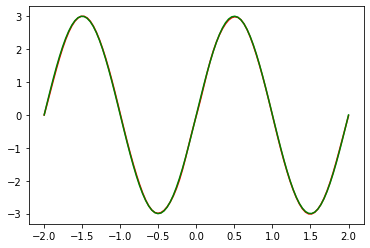

In [112]:

plt.plot(x_testv, a, color='red')
plt.plot(x_testv,3*np.sin(np.pi*x), color= 'green')
plt.show()


# $1 + 2x+ 4x^3$ 

In [125]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        
    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size=tf.shape(data)[0]
        x=tf.random.uniform((batch_size,1),minval=-2,maxval=2)
    
        with tf.GradientTape() as tape: 
            #Compute the loss value
            y_pred = self(x, training=True)
            eq = 1+2*x+4*x**3
            loss= keras.losses.mean_squared_error(eq, y_pred)
        # Apply grads
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Update metrics
        self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
        return {"loss": self.loss_tracker.result()}

In [126]:
model = ODEsolver()

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [127]:
model.summary()

Model: "od_esolver_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 10)                20        
                                                                 
 dense_86 (Dense)            (None, 10)                110       
                                                                 
 dense_87 (Dense)            (None, 10)                110       
                                                                 
 dense_88 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.compile(optimizer = RMSprop(), metrics=['loss'])

x= tf.linspace(-2,2,100)
history = model.fit(x, epochs=1000, verbose=1)

x_testv = tf.linspace(-2,2,100)
a = model.predict(x_testv)

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5423
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4643
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4074
Epoch 4/1000
4/4 [==============================] - 0s 836us/step - loss: 0.1996
Epoch 5/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.2416
Epoch 6/1000
4/4 [==============================] - 0s 835us/step - loss: 0.3262
Epoch 7/1000
4/4 [==============================] - 0s 666us/step - loss: 0.3094
Epoch 8/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0923
Epoch 9/1000
4/4 [==============================] - 0s 667us/step - loss: 0.2667
Epoch 10/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.5668
Epoch 11/1000
4/4 [==============================] - 0s 834us/step - loss: 0.6829
Epoch 12/1000
4/4 [==============================] - 0s 666us/step - loss: 0.2493
Epoch 13/1000
4/4 [==========

4/4 [==============================] - 0s 667us/step - loss: 0.0887
Epoch 102/1000
4/4 [==============================] - 0s 835us/step - loss: 0.1050
Epoch 103/1000
4/4 [==============================] - 0s 666us/step - loss: 0.1548
Epoch 104/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0888
Epoch 105/1000
4/4 [==============================] - 0s 669us/step - loss: 0.1087
Epoch 106/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0665
Epoch 107/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0132
Epoch 108/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1667
Epoch 109/1000
4/4 [==============================] - 0s 835us/step - loss: 0.3235
Epoch 110/1000
4/4 [==============================] - 0s 666us/step - loss: 0.1305
Epoch 111/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0928
Epoch 112/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0906
Epoch 113/1000
4/4 [

Epoch 200/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0721
Epoch 201/1000
4/4 [==============================] - 0s 667us/step - loss: 0.1594
Epoch 202/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0516
Epoch 203/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0988
Epoch 204/1000
4/4 [==============================] - 0s 667us/step - loss: 0.1304
Epoch 205/1000
4/4 [==============================] - 0s 836us/step - loss: 0.0435
Epoch 206/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0601
Epoch 207/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0137
Epoch 208/1000
4/4 [==============================] - 0s 836us/step - loss: 0.1492
Epoch 209/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0249
Epoch 210/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0549
Epoch 211/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0057
Epo

4/4 [==============================] - 0s 334us/step - loss: 0.0731
Epoch 299/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0515
Epoch 300/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0289
Epoch 301/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0389
Epoch 302/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0678
Epoch 303/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0739
Epoch 304/1000
4/4 [==============================] - 0s 840us/step - loss: 0.1205
Epoch 305/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0097
Epoch 306/1000
4/4 [==============================] - 0s 667us/step - loss: 0.1061
Epoch 307/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0178
Epoch 308/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0077
Epoch 309/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0225
Epoch 310/1000
4/4 

4/4 [==============================] - 0s 666us/step - loss: 0.0137
Epoch 397/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 398/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0085
Epoch 399/1000
4/4 [==============================] - 0s 667us/step - loss: 0.1266
Epoch 400/1000
4/4 [==============================] - 0s 666us/step - loss: 0.1140
Epoch 401/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0639
Epoch 402/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0077
Epoch 403/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0206
Epoch 404/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0350
Epoch 405/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0361
Epoch 406/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0210
Epoch 407/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0321
Epoch 408/1000
4/4 

Epoch 495/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0180
Epoch 496/1000
4/4 [==============================] - 0s 502us/step - loss: 0.1150
Epoch 497/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0200
Epoch 498/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0165
Epoch 499/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0412
Epoch 500/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0416
Epoch 501/1000
4/4 [==============================] - 0s 667us/step - loss: 0.2022
Epoch 502/1000
4/4 [==============================] - 0s 836us/step - loss: 0.0231
Epoch 503/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0636
Epoch 504/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0079
Epoch 505/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0343
Epoch 506/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0176
Epoc

4/4 [==============================] - 0s 667us/step - loss: 0.0451
Epoch 594/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0570
Epoch 595/1000
4/4 [==============================] - 0s 503us/step - loss: 0.0180
Epoch 596/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0511
Epoch 597/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0252
Epoch 598/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0281
Epoch 599/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0900
Epoch 600/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0370
Epoch 601/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 602/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0293
Epoch 603/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0492
Epoch 604/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0382
Epoch 605/1000
4/4 [=

Epoch 692/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0376
Epoch 693/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0606
Epoch 694/1000
4/4 [==============================] - 0s 834us/step - loss: 0.0196
Epoch 695/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0539
Epoch 696/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0841
Epoch 697/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0423
Epoch 698/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0296
Epoch 699/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0354
Epoch 700/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0398
Epoch 701/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0596
Epoch 702/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0197
Epoch 703/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0083
Epoc

4/4 [==============================] - 0s 333us/step - loss: 0.0499
Epoch 791/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0731
Epoch 792/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0081
Epoch 793/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0069
Epoch 794/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0868
Epoch 795/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0337
Epoch 796/1000
4/4 [==============================] - 0s 836us/step - loss: 0.0795
Epoch 797/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0311
Epoch 798/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0326
Epoch 799/1000
4/4 [==============================] - 0s 502us/step - loss: 0.0329
Epoch 800/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0612
Epoch 801/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0147
Epoch 802/1000
4/4 

Epoch 889/1000
4/4 [==============================] - 0s 837us/step - loss: 0.0869
Epoch 890/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0440
Epoch 891/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0209
Epoch 892/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0232
Epoch 893/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0109
Epoch 894/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0184
Epoch 895/1000
4/4 [==============================] - 0s 836us/step - loss: 0.1140
Epoch 896/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0297
Epoch 897/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0368
Epoch 898/1000
4/4 [==============================] - 0s 502us/step - loss: 0.0090
Epoch 899/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0342
Epoch 900/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0478
Epoch 

4/4 [==============================] - 0s 501us/step - loss: 0.0027
Epoch 988/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0063
Epoch 989/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0498
Epoch 990/1000
4/4 [==============================] - 0s 834us/step - loss: 0.0975
Epoch 991/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0626
Epoch 992/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0059
Epoch 993/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0108
Epoch 994/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0099
Epoch 995/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0095
Epoch 996/1000
4/4 [==============================] - 0s 501us/step - loss: 0.2125
Epoch 997/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0524
Epoch 998/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0060
Epoch 999/1000
4/4 [===

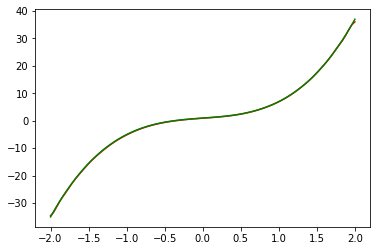

In [134]:
plt.plot(x_testv, a, color='red')
plt.plot(x_testv,1+2*x+4*x**3, color= 'green')
plt.show()
